In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot theme
sns.set(style="whitegrid")


In [17]:
covid_df = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/COVID-19/covid19_Confirmed_dataset.csv")
happiness_df = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/COVID-19/worldwide_happiness_report.csv")


In [18]:
print("COVID Data Shape:", covid_df.shape)
print("Happiness Data Shape:", happiness_df.shape)
print("\nCOVID Sample:\n", covid_df.head())
print("\nHappiness Sample:\n", happiness_df.head())

COVID Data Shape: (266, 104)
Happiness Data Shape: (156, 9)

COVID Sample:
   Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4

In [19]:
# Drop unnecessary columns
covid_df.drop(columns=["Province/State", "Lat", "Long"], inplace=True)

# Get latest available date column (last column in DataFrame)
latest_date = covid_df.columns[-1]

# Group data by country and sum up latest confirmed cases
covid_summary = covid_df.groupby("Country/Region")[[latest_date]].sum().reset_index()
covid_summary.columns = ["Country", "Confirmed"]

In [20]:
# Rename columns for consistency
happiness_df.rename(columns={
    "Country or region": "Country",
    "Score": "Happiness Score"
}, inplace=True)

# Only keep relevant columns
happiness_df = happiness_df[["Country", "Happiness Score", "GDP per capita", "Social support"]]


In [21]:
# Merge datasets on country name
merged_df = pd.merge(covid_summary, happiness_df, on="Country")

# Drop rows with missing values (if any)
merged_df.dropna(inplace=True)

# View merged data
merged_df.head()


,Country,Confirmed,Happiness Score,GDP per capita,Social support
0,Afghanistan,2171,3.203,0.350,0.517
1,Albania,773,4.719,0.947,0.848
2,Algeria,4006,5.211,1.002,1.160
3,Argentina,4428,6.086,1.092,1.432
4,Armenia,2066,4.559,0.850,1.055


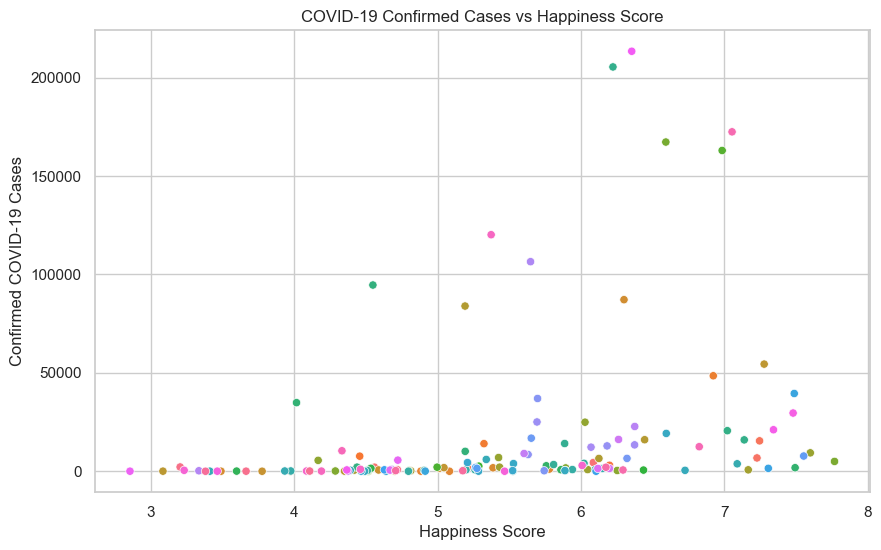

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="Happiness Score", y="Confirmed", hue="Country", legend=False)
plt.title("COVID-19 Confirmed Cases vs Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Confirmed COVID-19 Cases")
plt.show()


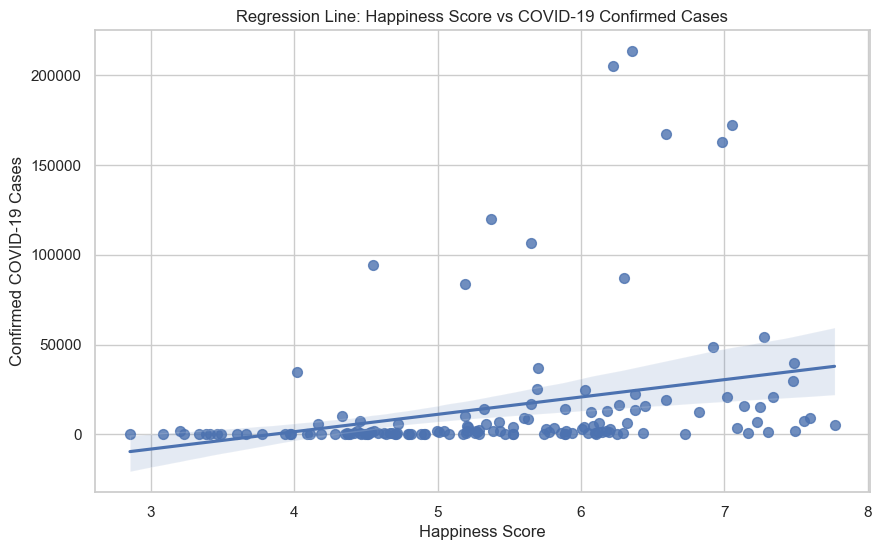

In [23]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x="Happiness Score", y="Confirmed", scatter_kws={"s": 50})
plt.title("Regression Line: Happiness Score vs COVID-19 Confirmed Cases")
plt.xlabel("Happiness Score")
plt.ylabel("Confirmed COVID-19 Cases")
plt.show()


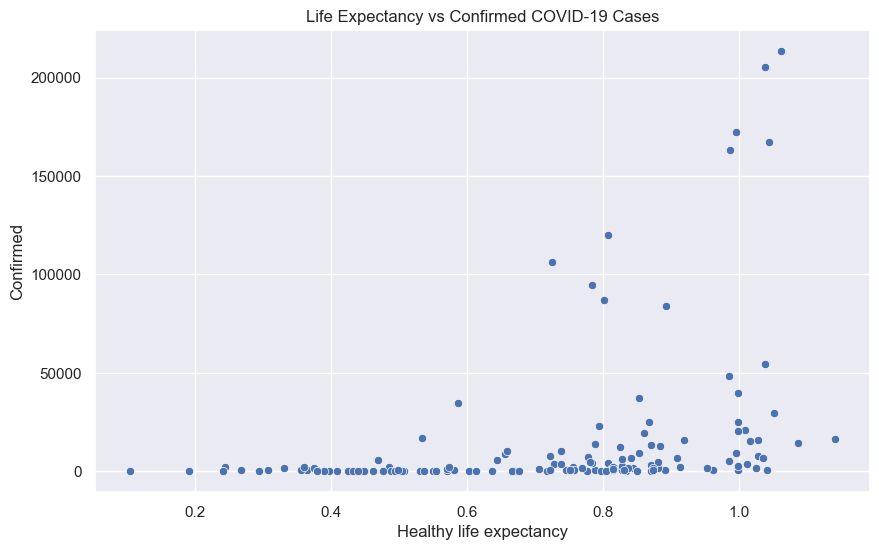

In [22]:
# Life Expectancy vs Confirmed
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Healthy life expectancy", y="Confirmed", data=combined_df)
plt.title("Life Expectancy vs Confirmed COVID-19 Cases")
plt.show()